# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**

# Introduction

I will be using the [2021-22 National Survey on Drug Use and Health (NSDUH)](https://datatools.samhsa.gov/nsduh/2022/nsduh-2021-2022-rd02yr/crosstab?row=STUSAB&column=PNRNMYR&weight=DASWT_1) from the Substance and Mental Health Services Administration (SAMHSA). This data set shows the prevalence of pain reliever misuse in each state. I picked this dataset because I have worked with substance use disorder data before for my job as public health researcher. I also intend to use similar data for my final project. 
______________
# Data Exploration
In this section, I import my dataset into this .ipynb, create dataframes, and explore my data.  

In [13]:
# Import libraries
import pandas as pd

path = "https://raw.githubusercontent.com/riverar9/data-602-final-project/refs/heads/main/data/STUSAB%20X%20PNRNMYR%20(2021-22).csv"

df = pd.read_csv(path)

# Preview dataframe
df.head()

,STATE US ABBREVIATION,RC-PAIN RELIEVERS - PAST YEAR MISUSE,Total %,Total % SE,Total % CI (lower),Total % CI (upper),Row %,Row % SE,Row % CI (lower),Row % CI (upper),Column %,Column % SE,Column % CI (lower),Column % CI (upper),Weighted Count,Count,Count SE
0,Overall,Overall,1.000,0.0000,NaN,NaN,1.0,0.0,NaN,NaN,1.000,0.0000,NaN,NaN,280926000,NaN,3041000
1,AK,Overall,0.002,0.0001,0.002,0.002,1.0,0.0,NaN,NaN,0.002,0.0001,0.002,0.002,586000,NaN,40000
2,AL,Overall,0.015,0.0008,0.014,0.017,1.0,0.0,NaN,NaN,0.015,0.0008,0.014,0.017,4260000,NaN,214000
3,AR,Overall,0.009,0.0007,0.008,0.011,1.0,0.0,NaN,NaN,0.009,0.0007,0.008,0.011,2535000,NaN,197000
4,AZ,Overall,0.022,0.0015,0.019,0.025,1.0,0.0,NaN,NaN,0.022,0.0015,0.019,0.025,6201000,NaN,429000


Below are summary statistics on means, medians, and quartiles for the numeric columns in my dataframe.

In [14]:
df.describe()

,Total %,Total % SE,Total % CI (lower),Total % CI (upper),Row %,Row % SE,Row % CI (lower),Row % CI (upper),Column %,Column % SE,Column % CI (lower),Column % CI (upper),Weighted Count,Count,Count SE
count,156.000000,156.000000,155.000000,155.000000,156.000000,156.000000,104.000000,104.000000,156.000000,156.000000,153.000000,153.000000,1.560000e+02,0.0,1.560000e+02
mean,0.025609,0.000760,0.017961,0.020955,0.666667,0.004096,0.487529,0.512471,0.038455,0.001807,0.016431,0.023791,7.203244e+06,NaN,2.564231e+05
std,0.111455,0.000871,0.078939,0.079773,0.450853,0.003385,0.468384,0.468384,0.136779,0.001910,0.019373,0.024833,3.130329e+07,NaN,4.058942e+05
min,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.007000,0.022000,0.002000,0.000000,0.001000,0.002000,1.400000e+04,NaN,3.000000e+03
25%,0.001000,0.000100,0.001000,0.001000,0.036000,0.000000,0.021000,0.044750,0.005750,0.000500,0.004000,0.007000,2.237500e+05,NaN,3.700000e+04
50%,0.006000,0.000400,0.005000,0.006000,0.970000,0.004450,0.483000,0.517000,0.014500,0.001250,0.011000,0.017000,1.570500e+06,NaN,1.260000e+05
75%,0.018000,0.001225,0.016000,0.021000,1.000000,0.006500,0.955250,0.979000,0.025250,0.002200,0.019000,0.030000,5.071500e+06,NaN,3.685000e+05
max,1.000000,0.004300,0.968000,0.971000,1.000000,0.011800,0.978000,0.993000,1.000000,0.012300,0.110000,0.142000,2.809260e+08,NaN,3.041000e+06


Below is missing value information.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   STATE US ABBREVIATION                 156 non-null    object 
 1   RC-PAIN RELIEVERS - PAST YEAR MISUSE  156 non-null    object 
 2   Total %                               156 non-null    float64
 3   Total % SE                            156 non-null    float64
 4   Total % CI (lower)                    155 non-null    float64
 5   Total % CI (upper)                    155 non-null    float64
 6   Row %                                 156 non-null    float64
 7   Row % SE                              156 non-null    float64
 8   Row % CI (lower)                      104 non-null    float64
 9   Row % CI (upper)                      104 non-null    float64
 10  Column %                              156 non-null    float64
 11  Column % SE        

The `Count` column is completely missing, but I can use the `Weighted Count` column for analyses instead. Our other variables of interest, ` STATE US ABBREVIATION`, `RC-PAIN RELIEVERS - PAST YEAR MISUSE`, and `Row %` are complete. 

# Data Wrangling

In this section, I tidy the data to show the state-specific prevalence of opioid misuse in the past 12 months. Each row in the dataframe will correspond to a state. This will require a change in structure of the source data, where each state has 3 observations: data on those who misused opioids, those who didn't, and both.

Since percentages in the `Row %` are rounded, I will recalculate them with from the `Weighted Count` column.

In [16]:
# Keep only columns of interest
df_subset = df[['STATE US ABBREVIATION', 'RC-PAIN RELIEVERS - PAST YEAR MISUSE', 'Row %', 'Row % CI (lower)', 'Row % CI (upper)', 'Weighted Count']]

df_subset.head()

,STATE US ABBREVIATION,RC-PAIN RELIEVERS - PAST YEAR MISUSE,Row %,Row % CI (lower),Row % CI (upper),Weighted Count
0,Overall,Overall,1.0,NaN,NaN,280926000
1,AK,Overall,1.0,NaN,NaN,586000
2,AL,Overall,1.0,NaN,NaN,4260000
3,AR,Overall,1.0,NaN,NaN,2535000
4,AZ,Overall,1.0,NaN,NaN,6201000


In [17]:
# Create a subset of the data on population size
df_population_size = df_subset.loc[df_subset['RC-PAIN RELIEVERS - PAST YEAR MISUSE'] == "Overall", ['STATE US ABBREVIATION', 'Weighted Count']]
df_population_size = df_population_size.rename(columns= {'Weighted Count': 'Population Size'})

In [18]:
# Create subset of data on state-specific prevalences from Row %
df_states = df_subset.loc[df_subset['RC-PAIN RELIEVERS - PAST YEAR MISUSE'] == "1 - Misused within the past year", ['STATE US ABBREVIATION', 'Weighted Count', 'Row %']]
df_states = df_states.rename(columns= {'Weighted Count': 'Numerator'})

In [19]:
# Merge columns
df_merged = df_states.merge(
    df_population_size,
    how = 'left'
)

# Generate prevalence calculated by hand from numerator and denominator
df_merged['Row %_manual'] = df_merged['Numerator']/df_merged['Population Size']

# Use pyjanitor to modify column names
import janitor
df_clean = df_merged.clean_names()

# Preview wrangled data
df_clean.head()

,state_us_abbreviation,numerator,row_%,population_size,row_%_manual
0,Overall,8561000,0.030,280926000,0.030474
1,AK,17000,0.030,586000,0.029010
2,AL,208000,0.049,4260000,0.048826
3,AR,109000,0.043,2535000,0.042998
4,AZ,211000,0.034,6201000,0.034027


Now that I've wrangled my data, I will show summary stats on it below.

In [20]:
df_clean.describe()

,numerator,row_%,population_size,row_%_manual
count,5.200000e+01,52.000000,5.200000e+01,52.000000
mean,3.292885e+05,0.031442,1.080490e+07,0.031377
std,1.177631e+06,0.008365,3.869178e+07,0.008428
min,1.400000e+04,0.013000,4.880000e+05,0.012428
25%,5.100000e+04,0.026000,1.582750e+06,0.026387
50%,1.365000e+05,0.030000,3.795000e+06,0.030483
75%,2.152500e+05,0.036000,6.744750e+06,0.036241
max,8.561000e+06,0.052000,2.809260e+08,0.052258


The average of the rounded and unroundede prevalence columns are very similar. 

# Visualizations

In this section, I practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, I create two plots, with several property modifications. 

First, I plot a bar plot of opioid misuse prevalence by state. I perform the following:
1)   changed the title and x/y labels,
2)   modified Axis Text Ticks/Labels by making the font size smaller, and
3)   changed the bar colors.

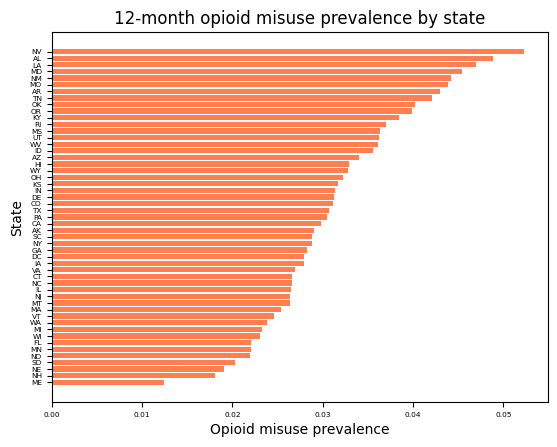

In [21]:
# Plot 1: bar plot of opioid misuse prevalence by state (matplotlib)
import matplotlib.pyplot as plt

# Manipulate data frame for use in bar plot
df_states_only = df_clean[df_clean["state_us_abbreviation"] != "Overall"] # Removing U.S. estimates to just plot states
df_states_only = df_states_only.sort_values(by="row_%_manual") # Ordering my data by prevalence

# Plot the data
plt.barh(df_states_only['state_us_abbreviation'], width = df_states_only['row_%_manual'], color='coral') # Plot light coral bars
plt.title("12-month opioid misuse prevalence by state") # Add title
plt.xlabel("Opioid misuse prevalence") # Add x label
plt.ylabel("State") # Add y label
plt.tick_params(axis='x', labelsize=5.3)  # Adjust x-axis tick label font size
plt.tick_params(axis='y', labelsize=5.3)  # Adjust y-axis tick label font size

# Display plot
plt.show()

The state with the highest opioid misuse prevalence in 2021-22 was Nevada at 5.2%, and the lowest was Maine at 1.3%

My second plot is a histogram showing the distribution of opioid misuse prevalence across states. I modified the following:
1)   changed the title and x/y labels,
2)   adjusted the binwidth,
3)   changed the bar colors, 
4)   overlayed a vertical line for the mean of the distribution and adjusted its line width and type,
5)   adjusted the chart dimensions,
6)   used and change the legend position, and
7)   changed the legend font size.

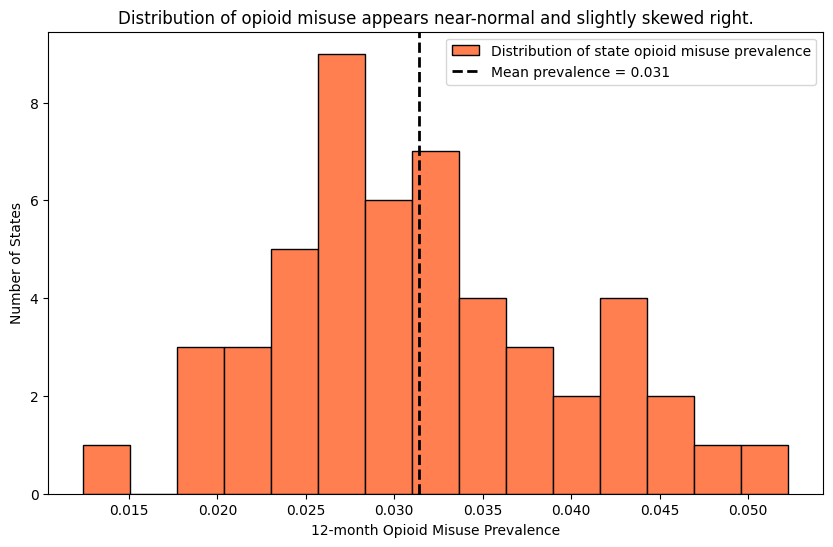

In [22]:
# Plot 2: Histogram of opioid prevalence by state (matplotlib)
import numpy as np
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6)) # Adjust fig size so legend does not overlap
plt.hist(df_states_only['row_%_manual'], bins=15, color='coral', edgecolor='black', label='Distribution of state opioid misuse prevalence')
plt.title("Distribution of opioid misuse appears near-normal and slightly skewed right.") # Add title
plt.xlabel("12-month Opioid Misuse Prevalence") # add x/y labels
plt.ylabel("Number of States")
plt.axvline(np.mean(df_states_only['row_%_manual']), color='black', linestyle='--', linewidth=2, label='Mean prevalence = 0.031')  # Add mean line with label
plt.legend(loc='upper right', fontsize=10)  # Show legend

# Display plot
plt.show()

The plot above shows that opioid misuse has the most states with opioid misuse prevalence between 2.5% and 3%--slightly lower than the average of 3.1%. I added the mean to the plot as a benchmark due to the slight skew.

### **Part 2:**

In this section, I recreate the visualizations above using the Seaborn library as best as possible, performing the same modifications that I outlined in Part 1.

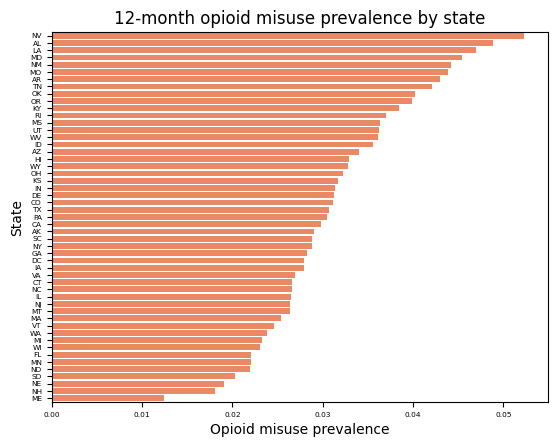

In [23]:
# Plot 1: bar plot of opioid misuse prevalence by state (seaborn)
import seaborn as sns

# Manipulate data prior to plotting
df_states_only2 = df_states_only.sort_values(by="row_%_manual", ascending=False) # Ordering my data by prevalence

# Plot barplot
sns.barplot(x='row_%_manual', y='state_us_abbreviation', data=df_states_only2, color='coral')
plt.title("12-month opioid misuse prevalence by state") # Add title
plt.xlabel("Opioid misuse prevalence") # Add x label
plt.ylabel("State") # Add y label
plt.tick_params(axis='x', labelsize=5.3)  # Adjust x-axis tick label font size
plt.tick_params(axis='y', labelsize=5.3)  # Adjust y-axis tick label font size

# Display plot
plt.show()

Again, the bar plot of prevalence shows that Nevada is still at the top with the highest opioid misuse prevalence in the country, and Maine has the lowest prevalence.

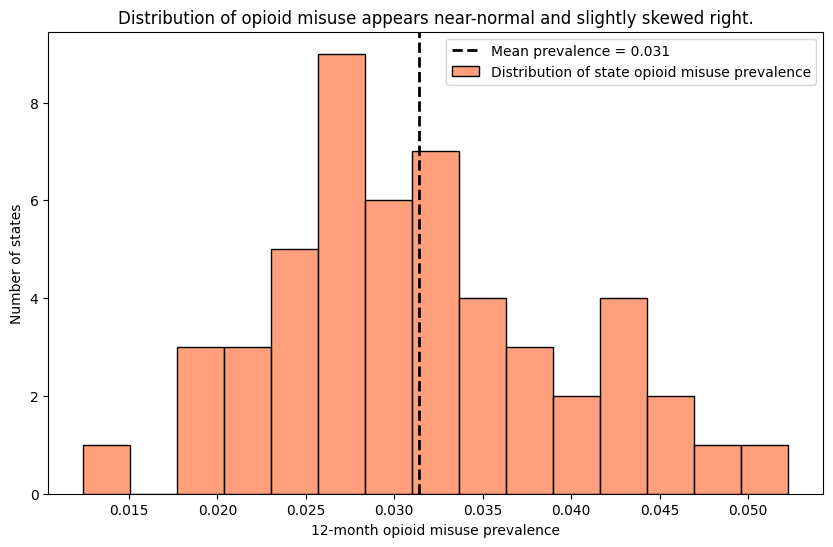

In [24]:
# Plot 2: Histogram of opioid prevalence by state (seaborn)

# Plot histogram with Seaborn
plt.figure(figsize=(10, 6))  # Adjust fig size so legend does not overlap
sns.histplot(df_states_only['row_%_manual'], bins=15, color='coral', edgecolor='black', label='Distribution of state opioid misuse prevalence')
plt.axvline(np.mean(df_states_only['row_%_manual']), color='black', linestyle='--', linewidth=2, label='Mean prevalence = 0.031')  # Add mean line with label
plt.title("Distribution of opioid misuse appears near-normal and slightly skewed right.") # Add title
plt.xlabel("12-month opioid misuse prevalence") # add x/y labels
plt.ylabel("Number of states")
plt.legend(loc='upper right', fontsize=10)  # Show legend

# Display plot
plt.show()

The chart above shows the same histogram, with the mode of the distribution slightly lower than the average. 

### **Part 3:**
Here are a few differences between creating a plot in matplotlib and seaborn, based on my above plots:
- Syntax: matplotlib uses the hist() method, while seaborn uses the histplot() method for histograms.
- In order to plot a horizontal barplot, matplotlib requires you to specify that with barh(). In seaborn, you simply have to switch which variable you put in each x- or y-axis.

More generally, while both libraries can produce similar plots, Matplotlib provides more customization, while Seaborn is allows users to create plots more quickly and easily.

# Conclusions  

I learned that, in the U.S., opioid misuse rates ranged from 1.3% to 5.2% and these data have some high outliers skewing the data (e.g., Nevada). In my final project, I will check to see if Medicaid expansion has anything to do with these rates--namely, if states who expanded Medicaid are more likely to have lower rates of opioid misuse. Nevada has not yet implemented Medicaid expansion (it will begin on January 1, 2026), so this finding from my figures so far align with my hypothesis.